<a href="https://colab.research.google.com/github/Yunhua468/Stochastic-Opetimization/blob/franz/ex_7_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import random
import scipy as sp
import numpy as np
from scipy.stats import expon
import matplotlib.pyplot as plt
%matplotlib inline

random.seed(42)
np.random.seed(42)

In [14]:
def X(theta):
  lambd = 1.0 / (50*theta)
  return random.expovariate(lambd)

(array([2.965e+03, 2.177e+03, 1.417e+03, 1.060e+03, 7.410e+02, 5.090e+02,
        3.320e+02, 2.270e+02, 1.700e+02, 1.330e+02, 7.900e+01, 5.500e+01,
        3.200e+01, 4.200e+01, 2.400e+01, 1.100e+01, 5.000e+00, 1.200e+01,
        2.000e+00, 3.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([1.29368528e+00, 1.78326985e+03, 3.56524602e+03, 5.34722218e+03,
        7.12919835e+03, 8.91117451e+03, 1.06931507e+04, 1.24751268e+04,
        1.42571030e+04, 1.60390792e+04, 1.78210553e+04, 1.96030315e+04,
        2.13850077e+04, 2.31669838e+04, 2.49489600e+04, 2.67309362e+04,
        2.85129123e+04, 3.02948885e+04, 3.20768647e+04, 3.38588408e+04,
        3.56408170e+04, 3.74227932e+04, 3.92047693e+04, 4.09867455e+04,
        4.27687216e+04, 4.45506978e+04, 4.63326740e+04, 4.81146501e+04,
        4.98966263e+04, 5.16786025e+04, 5.34605786e+04, 5.52425548e+04,
        5.70245310e+04

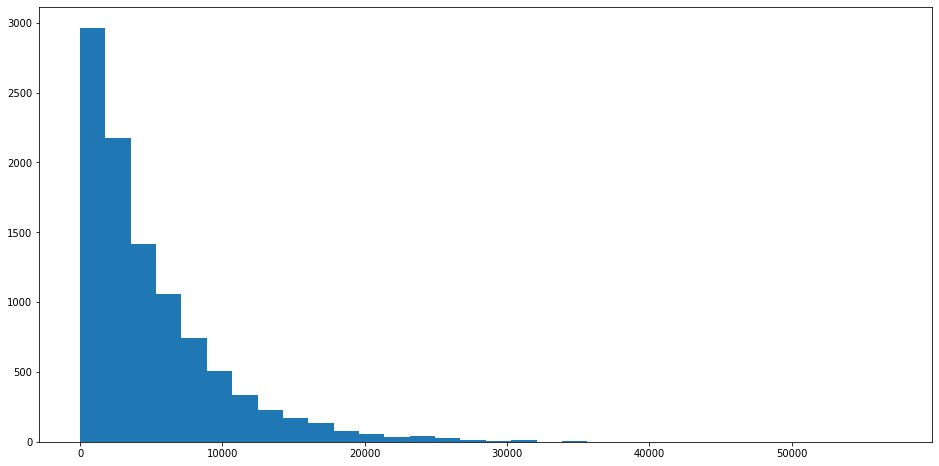

In [16]:
plt.figure(figsize=(16, 8))
plt.hist([X(100) for i in range(10000)], bins=32)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


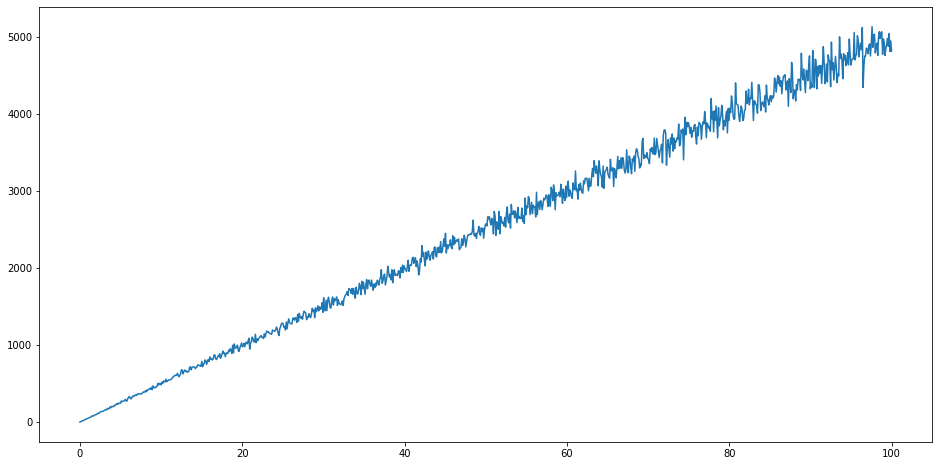

In [20]:
thetas = np.linspace(0, 100, 1000)
Xs = np.zeros_like(thetas)
for i in range(1000):
  Xs += np.array([X(theta) for theta in thetas])
Xs /= 1000
plt.figure(figsize=(16, 8))
plt.plot(thetas, Xs)